In [1]:
import os
import numpy as np
from PIL import Image

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style='darkgrid')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
#압축풀기
import zipfile

local_zip = '/content/drive/MyDrive/데이터저장/인간vs애니.zip'

zip_ref = zipfile.ZipFile(local_zip, 'r')

zip_ref.extractall('/content/humanoranime')
zip_ref.close()

# 경로지정

In [5]:
base_dir='/content/humanoranime'

train_dir=os.path.join(base_dir,'train')
test_dir=os.path.join(base_dir,'test')

In [6]:
train_anime_dir=os.path.join(train_dir,'anime')
train_human_dir=os.path.join(train_dir,'human')

test_anime_dir=os.path.join(test_dir,'anime')
test_human_dir=os.path.join(test_dir,'human')

In [7]:
train_anime_list=os.listdir(train_anime_dir)
train_human_list=os.listdir(train_human_dir)

test_anime_list=os.listdir(test_anime_dir)
test_human_list=os.listdir(test_human_dir)

In [8]:
print('train anime {}'.format(len(train_anime_list)))
print('train human {}'.format(len(train_human_list)))

print('test anime {}'.format(len(test_anime_list)))
print('test human {}'.format(len(test_human_list)))

train anime 85060
train human 30904
test anime 56
test human 11995


# 데이터셋/전처리

In [9]:
batch=32
img_height=250
img_width=250

In [10]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen=ImageDataGenerator(rescale=1./255,
                                 rotation_range=30,
                                 shear_range=0.3,
                                 zoom_range=0.3
                                 )
test_datagen=ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(train_dir,
                                                  batch_size=batch,
                                                  class_mode='binary',
                                                  target_size=(img_width,img_height)
                                                  )
test_generator=test_datagen.flow_from_directory(test_dir,
                                                batch_size=batch,
                                                class_mode='binary',
                                                target_size=(img_width,img_height)
                                                )

Found 115964 images belonging to 2 classes.
Found 12051 images belonging to 2 classes.


In [11]:
print(train_generator.class_indices.items())

print(test_generator.class_indices.items())

dict_items([('anime', 0), ('human', 1)])
dict_items([('anime', 0), ('human', 1)])


# 모델만들기

In [12]:
import tensorflow as tf

tf.__version__

from tensorflow.keras import datasets, layers, models
from keras.preprocessing import image
from keras.engine.sequential import Sequential
from tensorflow import keras
from keras import regularizers

In [14]:
kernel_s=(3,3)

model=models.Sequential()

model.add(layers.Conv2D(32,kernel_s,activation='relu',input_shape=(img_height,img_width,3),
                        kernel_regularizer=regularizers.l2(0.001),padding="VALID"))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, kernel_s, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(64, kernel_s, activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Conv2D(128,kernel_s,activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 248, 248, 32)      896       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 124, 124, 32)     0         
 2D)                                                             
                                                                 
 conv2d_6 (Conv2D)           (None, 122, 122, 64)      18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 61, 61, 64)       0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 59, 59, 64)        36928     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 29, 29, 64)      

In [15]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics='accuracy'
              )

# 학습하기

In [16]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopping=EarlyStopping(monitor='val_loss', #val_loss 값이 개선되었을 때
                            patience=5 #5회 epoch 동안 val_loss가 개선되지 않는다면 종료
                            )

In [17]:
history=model.fit(train_generator,
                  steps_per_epoch=70,
                  epochs=20,
                  validation_data=test_generator,
                  validation_steps=50,
                  callbacks=[earlystopping]
                  )

Epoch 1/20
70/70 [==============================] - 41s 450ms/step - loss: 0.2424 - accuracy: 0.8991 - val_loss: 0.2049 - val_accuracy: 0.9369
Epoch 2/20
70/70 [==============================] - 31s 442ms/step - loss: 0.0740 - accuracy: 0.9812 - val_loss: 0.1342 - val_accuracy: 0.9506
Epoch 3/20
70/70 [==============================] - 31s 440ms/step - loss: 0.0655 - accuracy: 0.9812 - val_loss: 0.3359 - val_accuracy: 0.8725
Epoch 4/20
70/70 [==============================] - 31s 444ms/step - loss: 0.0529 - accuracy: 0.9848 - val_loss: 0.0597 - val_accuracy: 0.9856
Epoch 5/20
70/70 [==============================] - 31s 443ms/step - loss: 0.0314 - accuracy: 0.9924 - val_loss: 0.2244 - val_accuracy: 0.9200
Epoch 6/20
70/70 [==============================] - 31s 447ms/step - loss: 0.0346 - accuracy: 0.9929 - val_loss: 0.0969 - val_accuracy: 0.9719
Epoch 7/20
70/70 [==============================] - 31s 438ms/step - loss: 0.0387 - accuracy: 0.9875 - val_loss: 0.0820 - val_accuracy: 0.9775

In [19]:
5

5

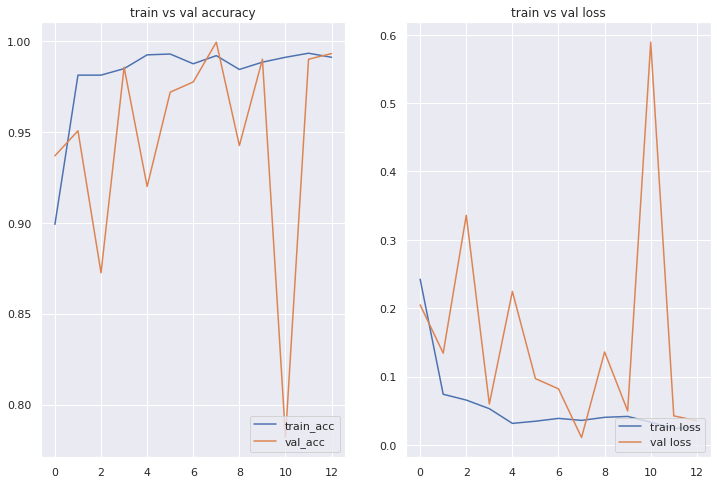

In [20]:
acc=history.history['accuracy']
val_acc=history.history['val_accuracy']

loss=history.history['loss']
val_loss=history.history['val_loss']

epochs_range=range(13)

plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label='train_acc')
plt.plot(epochs_range, val_acc, label='val_acc')
plt.legend(loc='lower right')
plt.title('train vs val accuracy')

plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label='train loss')
plt.plot(epochs_range, val_loss, label='val loss')
plt.legend(loc='lower right')
plt.title('train vs val loss')

plt.show()

In [21]:
#모델 저장하기
from keras.models import load_model
model.save('애니인간분류.h5')

# 시각화

In [22]:
import cv2
import glob

test_img_list=[]

test_img_name_list=glob.glob('테스트용/*')

for i in range(len(test_img_name_list)):
    src_img = cv2.imread(test_img_name_list[i], cv2.IMREAD_COLOR)
    src_img = cv2.resize(src_img, dsize=(img_width, img_height))
    src_img = cv2.cvtColor(src_img, cv2.COLOR_BGR2RGB)
    src_img = src_img / 255.0

    test_img_list.append(src_img)

1/1 [==============================] - 1s 558ms/step


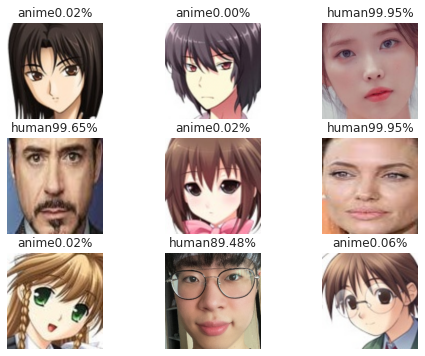

In [23]:
pred=model.predict(np.array(test_img_list))

plt.figure(figsize=(8,6))

for i in range(len(test_img_list)):
  plt.subplot(3,3,i+1)
  prob='{0:0.2f}'.format(100*max(pred[i]))
  if(pred[i]>=0.5):
    title_str='human' + prob+'%'
    plt.title(title_str)

  else:
    title_str='anime' + prob + '%'
    plt.title(title_str)

  plt.imshow(test_img_list[i])
  plt.axis('off')
plt.show()